In [1]:
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import hmmlearn

from hmmlearn.hmm import GaussianHMM

In [2]:
df = pd.read_csv("month.csv", header=None, names=["time","counts","span"])

In [3]:
df2 = df["time"]

In [4]:
df['time'] = pd.to_datetime(df['time'].astype(int), unit='s')

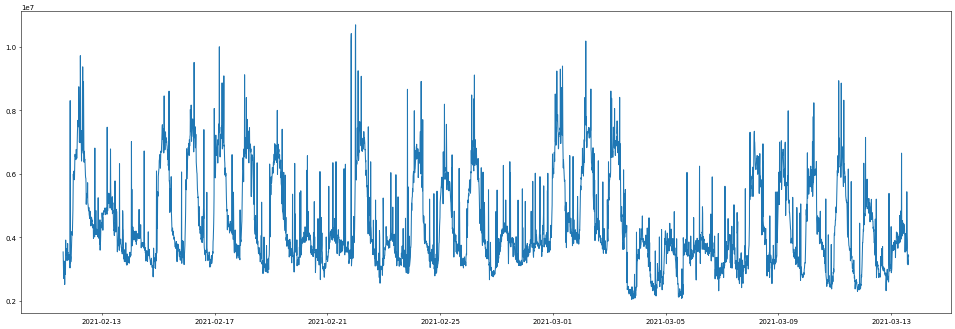

In [5]:
import matplotlib.pyplot as plt
import matplotlib.dates as md
import dateutil

plt.figure(figsize=(24, 8), dpi=50)
plt.plot(df['time'], df['counts'])

In [6]:
observations = df['counts']

In [7]:
x = -0.37727

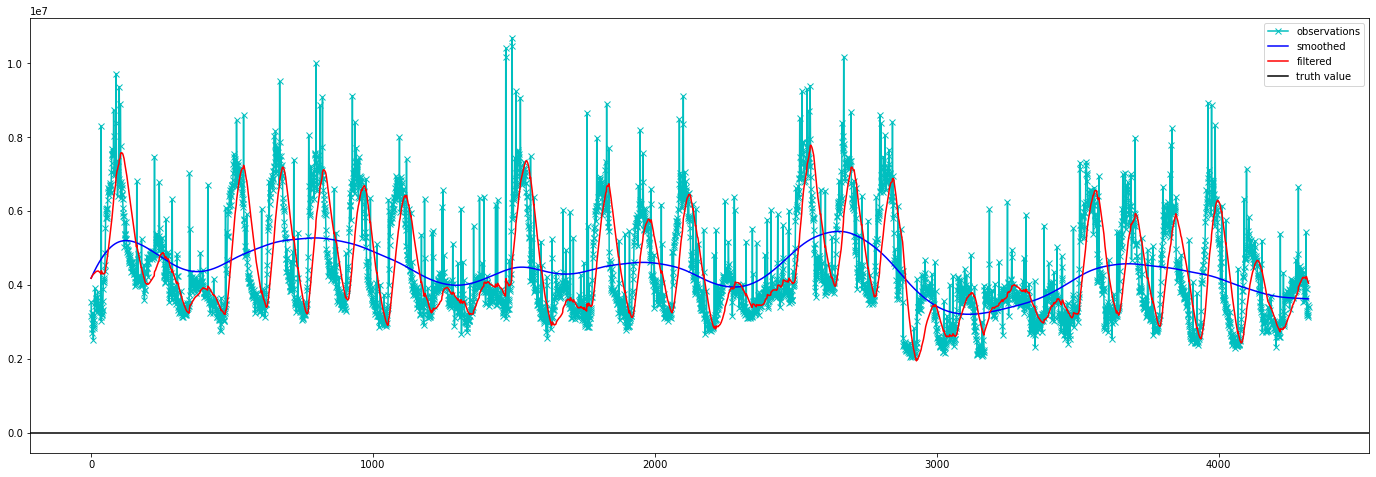

In [10]:
from pykalman import KalmanFilter

kf = KalmanFilter(transition_matrices=np.array([[1, 1], [0, 1]]),
                  transition_covariance=0.0000001*np.eye(2))

smoothed_states_pred = kf.em(observations).smooth(observations)[0]
filtered_states_pred = kf.em(observations).filter(observations)[0]

plt.figure(figsize=(24, 8))
plt.plot(observations, "-xc", label="observations")
plt.plot(smoothed_states_pred[:, 0], "b", label="smoothed")
plt.plot(filtered_states_pred[:, 0], "r", label="filtered")
plt.axhline(x, color="k", label="truth value")
plt.legend()
plt.show()



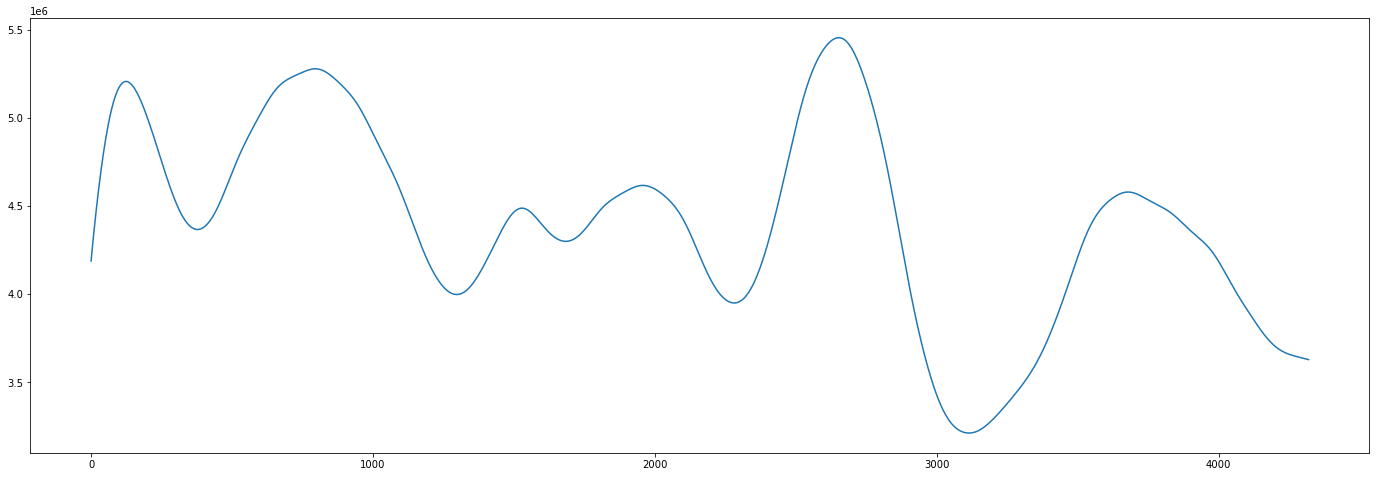

In [23]:
plt.figure(figsize=(24, 8))
plt.plot(smoothed_states_pred[:, 0])

In [30]:
V = smoothed_states_pred[:, 0]
vals = np.expand_dims(V, 1)
n_states = 2
model = GaussianHMM(n_components=n_states, n_iter=100).fit(vals)
hidden_states = model.predict(vals)

In [31]:
np.bincount(hidden_states)

array([2853, 1467], dtype=int64)

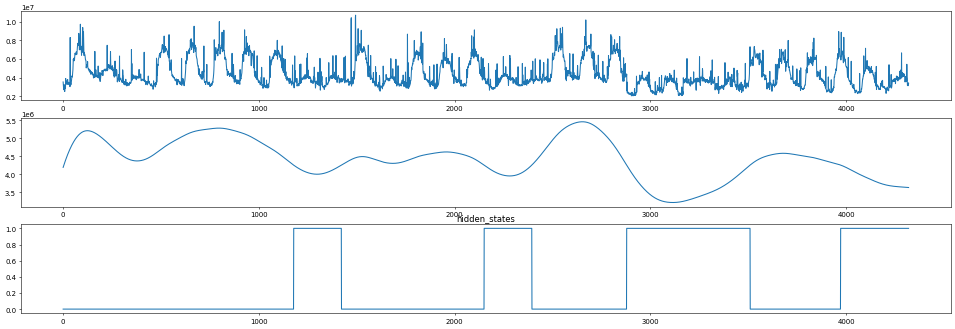

In [35]:
plt.figure(figsize=(24, 8), dpi=50)

plt.subplot(3, 1, 1)
plt.plot(observations)

plt.subplot(3, 1, 2)
plt.plot(smoothed_states_pred[:, 0])

plt.subplot(3, 1, 3)
plt.title("hidden_states")
plt.plot(hidden_states)
